### This file is used to evaluate the stored model

In [82]:
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *

import torch

In [83]:
test_file_name = "Cs_Xe_training.csv"
train_file_name = "Cs_Xe_testing.csv"

# test_file_name = "Cs_Xe_shuffle_training.csv"
# train_file_name = "Cs_Xe_shuffle_testing.csv"
model_name = 'reverse_order'
model_type = SimpleLSTM

batch_size = 16
sequence_length = 10

In [84]:
# read the hyperparameter dict
import json

def read_json_to_dict(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

model = model_type(**read_json_to_dict(f"./Model_params/{model_name}"))

model.parameters

<bound method Module.parameters of SimpleLSTM(
  (LSTM): LSTM(302, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (hidden_to_output): Linear(in_features=256, out_features=1, bias=True)
)>

In [85]:
# read the state dict

model.load_state_dict(torch.load(f"./Model/{model_name}"))

<All keys matched successfully>

In [86]:
# this function is written by chatgpt. Many thanks to him!

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def eval(data, batch_size, sequence_length):
    # Assuming you have a DataSet object called 'training_data' and a trained model called 'model'
    training_set = data
    # Step 1: Create a DataLoader from your DataSet object
    batch_size = batch_size  # Adjust this value based on your model's input requirements
    train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=False)

    # Step 2 & 3: Iterate through the DataLoader and collect predictions and true labels
    predictions = []
    true_labels = []

    sequence_length = sequence_length  # Assuming a sequence length of 10

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in train_loader:
            # Pass the input data to the trained model and collect the predictions
            preds = model(inputs)
            preds = preds.reshape(-1, sequence_length)  # Reshape the predictions to (batch_size, sequence_length, output_dim)
            predictions.extend(preds.squeeze().view(-1).tolist())  # Flatten the predictions
            true_labels.extend(labels.squeeze().view(-1).tolist())  # Flatten the true labels

    # Step 4: Plot the predictions and true labels for comparison
    loss = nn.MSELoss()
    tensor1 = torch.tensor(predictions)
    tensor2 = torch.tensor(true_labels)
    test_loss = loss(tensor1, tensor2)
    print(test_loss)
    plt.figure()
    plt.xlabel('Timestamp')
    plt.ylabel('Keff')
    plt.plot(true_labels, label="Real")
    plt.plot(predictions, label="Predict", alpha = 0.7)
    plt.legend()
    plt.show()

    return np.array(true_labels), np.array(predictions)


# For training data

[[-1.21604286]
 [-1.37555088]
 [-1.62473724]
 ...
 [-0.20096699]
 [-0.05381614]
 [-0.05224757]]
tensor(0.0392)


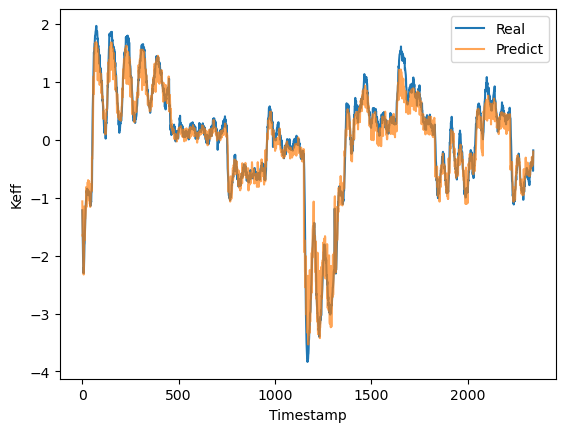

In [87]:
hard_run_data = np.loadtxt(f'./Processed Data/{train_file_name}', delimiter= ',', dtype= np.float64)

hard_ss = StandardScaler()

hard_run_data = hard_ss.fit_transform(hard_run_data)
hard_run_dataset = ReactorData(hard_run_data, sequence_length, 0 ,1)
all_labels, predictions =  eval(hard_run_dataset, batch_size, sequence_length)


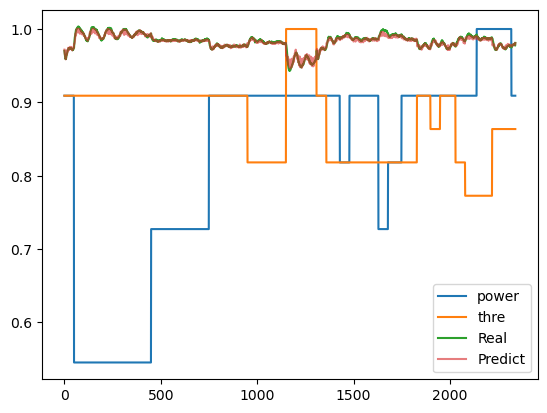

In [88]:
# change to the original unit
true_labels = all_labels
predictions = predictions
X = hard_run_dataset.unshaped_data

result_y = np.append(true_labels.reshape(-1,1),X, axis=1)
result_predict = np.append(predictions.reshape(-1,1),X,  axis=1)

y = hard_ss.inverse_transform(result_y)
# print(y)
predict = hard_ss.inverse_transform(result_predict)

plt.figure()
# plt.ylim((0.8,1.1))
plt.plot(y[:,1]/max(y[:,1]), label = "power")
plt.plot(y[:,2]/max(y[:,2]), label = "thre")
plt.plot(y[:,0], label = "Real")     
plt.plot(predict[:,0], label = "Predict", alpha = 0.6)
plt.legend()

# For testing data

[[-0.32257905]
 [ 0.14232809]
 [ 0.3584349 ]
 ...
 [-1.46539035]
 [-1.4508793 ]
 [-1.60540577]]
tensor(0.1846)


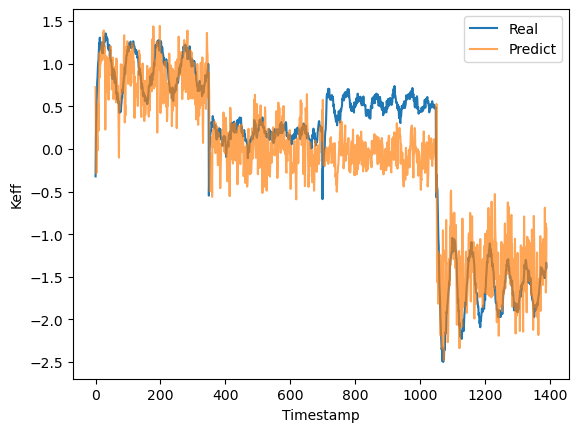

In [89]:
hard_run_data = np.loadtxt(f'./Processed Data/{test_file_name}', delimiter= ',', dtype= np.float64)

hard_ss = StandardScaler()

hard_run_data = hard_ss.fit_transform(hard_run_data)
hard_run_dataset = ReactorData(hard_run_data, sequence_length, 0 ,1)
all_labels, predictions =  eval(hard_run_dataset, batch_size, sequence_length)





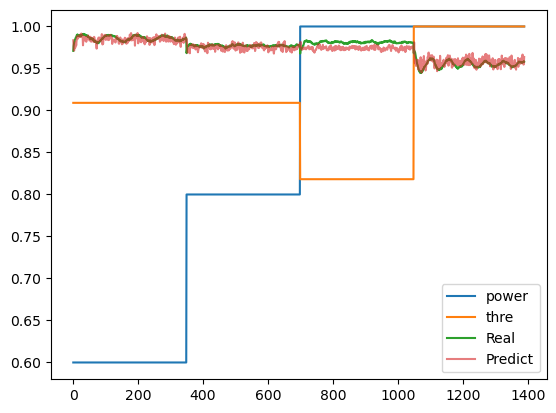

In [90]:
# change to the original unit
true_labels = all_labels
predictions = predictions
X = hard_run_dataset.unshaped_data

result_y = np.append(true_labels.reshape(-1,1),X, axis=1)
result_predict = np.append(predictions.reshape(-1,1),X,  axis=1)

y = hard_ss.inverse_transform(result_y)
# print(y)
predict = hard_ss.inverse_transform(result_predict)

plt.figure()
# plt.ylim((0.8,1.1))
plt.plot(y[:,1]/max(y[:,1]), label = "power")
plt.plot(y[:,2]/max(y[:,2]), label = "thre")
plt.plot(y[:,0], label = "Real")     
plt.plot(predict[:,0], label = "Predict", alpha = 0.6)
plt.legend()